In [1]:
import csv
import matplotlib.pyplot as plt
direct = '/Users/briannaryan/Desktop/CEvNS/Single Isotope Neutrino Generator/tests/'

In [2]:
# Read Spectrum CSV File
def read_csv(file_name) :
    spec_file = direct + file_name
    energies = []
    counts = []

    with open(spec_file) as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader :
            energies.append(float(row[0]))
            counts.append(float(row[1]))
            
    return energies, counts

In [15]:
cs_energies, cs_counts = read_csv('Cs-137/Cs-137_Neutrino_Spectrum.csv')
cs_1176_energies, cs_1176_counts = read_csv('Cs-137/Cs-137_Neutrino_1176.csv')
cd_energies, cd_counts = read_csv('Cd-109/Cd-109_Neutrino_Spectrum.csv')
co_energies, co_counts = read_csv('Co-57/Co-57_Neutrino_Spectrum.csv')
ir_energies, ir_counts = read_csv('Ir-192/Ir-192_Neutrino_Spectrum.csv')
ir_672_energies, ir_672_counts = read_csv('Ir-192/Ir-192_Neutrino_672.csv')
ir_535_energies, ir_535_counts = read_csv('Ir-192/Ir-192_Neutrino_535.csv')

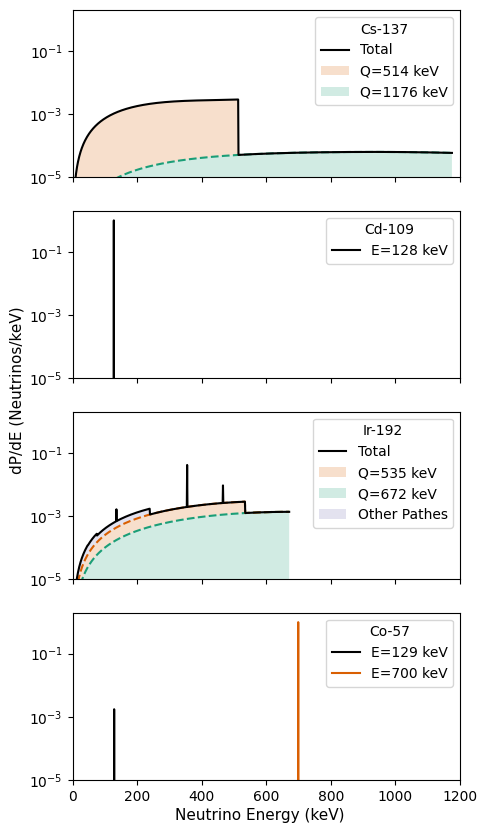

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
fig.set_size_inches(5, 10)

#ax1.axvline(x=514.03, color='#d95f02', ls='dashed', alpha=0.5, label='E=514 keV')
#ax1.axvline(x=1176, color='#1b9e77', ls='dashed', alpha=0.5, label='E=1176 keV')
ax1.plot(cs_1176_energies, cs_1176_counts, color='#1b9e77', linestyle='dashed')
ax1.plot(cs_energies, cs_counts, color='black', label='Total')
ax1.fill_between(cs_energies, cs_1176_counts, cs_counts, facecolor='#d95f02', alpha=0.2, label='Q=514 keV')
ax1.fill_between(cs_energies, 0, cs_1176_counts, facecolor='#1b9e77', alpha=0.2, label='Q=1176 keV')
ax1.legend(title='Cs-137')

ax2.plot(cd_energies, cd_counts, color='black', label='E=128 keV')
ax2.legend(title='Cd-109')

#ax3.axvline(x=355.9, color='#d95f02', ls='dashed', alpha=0.5, label='E=356 keV')
#ax3.axvline(x=672, color='#1b9e77', ls='dashed', alpha=0.5, label='E=672 keV')
ax3.plot(ir_672_energies, ir_672_counts, color='#1b9e77', linestyle='dashed')
ax3.plot(ir_535_energies, ir_535_counts, color='#d95f02', linestyle='dashed')
ax3.plot(ir_energies, ir_counts, color='black', label='Total')
ax3.fill_between(ir_energies, ir_672_counts, ir_535_counts, facecolor='#d95f02', alpha=0.2, label='Q=535 keV')
ax3.fill_between(ir_energies, 0, ir_672_counts, facecolor='#1b9e77', alpha=0.2, label='Q=672 keV')
ax3.fill_between(ir_energies, ir_535_counts, ir_counts, facecolor='#7570b3', alpha=0.2, label='Other Pathes')
ax3.legend(title='Ir-192')

ax4.plot(co_energies[0:200], co_counts[0:200], color='black', label='E=129 keV')
ax4.plot(co_energies[200:-1], co_counts[200:-1], color='#d95f02', label='E=700 keV')
ax4.legend(title='Co-57')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

ax1.set_xlim(0, 1200)
ax2.set_xlim(0, 1200)
ax3.set_xlim(0, 1200)
ax4.set_xlim(0, 1200)

ax1.set_ylim(10**(-5), 2)
ax2.set_ylim(10**(-5), 2)
ax3.set_ylim(10**(-5), 2)
ax4.set_ylim(10**(-5), 2)

#ax1.grid(which='both', alpha=0.5)
#ax2.grid(which='both', alpha=0.5)
#ax3.grid(which='both', alpha=0.5)
#ax4.grid(which='both', alpha=0.5)

fig.text(0.5, 0.07, 'Neutrino Energy (keV)', ha='center', fontsize=11)
fig.text(0.0, 0.5, 'dP/dE (Neutrinos/keV)', va='center', rotation='vertical', fontsize=11)
plt.savefig('paper_spectra_v2.pdf')